In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import os
import seaborn as sns
import charts_function_list
_,data,outputs = charts_function_list.folder_setup()

In [10]:
ls

ALL_NBA_team.csv
Bed_Size.png
Boardgames.png
DC_film_comparison.png
DC_film_comparison_.png
Metric_Bed.png
Monuments.png
Poke Count.png
Population Comparison.png
Population Comparison_metro_sort.png
Population Comparison_percent_diff_sort.png
Population Comparison_ratio_sort.png
US_Bed.png
dog_intelligence.png
lil_rappers.png
lots_of_sequels.png
lots_of_sequels_std.png
mar_a_lago_drop.png
movie_list_interim.csv
tallest_us_2021.png


In [227]:
empty = []

url = "https://www.basketball-reference.com/teams/WAS"
html = urlopen(url) #get_request
soup = BeautifulSoup(html,"lxml") 

column_headers = [th.getText() for th in 
                  soup.findAll('tr', limit=2)[0].findAll('th')]

for i,v in enumerate(['WAS','MIL','TOR','ORL','MIA',
            'CLE','NJN','DET','CHA','IND',
             'BOS','ATL','PHI','NYK','CHI',
             'LAC','SAS','MEM','HOU',
             'MIN','POR','UTA','GSW','OKC',
             'NOH','LAL','DEN','PHO','SAC','DAL']):
    url = "https://www.basketball-reference.com/teams/"+v
    html = urlopen(url) #get_request
    soup = BeautifulSoup(html,"lxml") #load into beuatiful soup
    
    table_rows = soup.select('#'+v+' tr')[2:] #selecting table row elements from within Team css selector
    data = extract_player_data(table_rows)
    empty.append(pd.DataFrame(data, columns=column_headers,index=[i for x in range(len(data))]))

all_nba = pd.concat(empty)
all_nba['Team']=all_nba['Team'].str.strip('*')
all_nba['W/L%'] = all_nba['W/L%'].astype('float')

os.chdir('/Users/alexanderpudlin/Documents/GitHub/charts_and_more_charts/outputs')
all_nba.to_csv('ALL_NBA_team.csv')

### Post scraping

In [35]:
os.chdir(outputs)
all_nba = pd.read_csv('ALL_NBA_team.csv',index_col=0)
team_dictionary = dict(all_nba[~all_nba.index.duplicated(keep='first')]['Team'])
all_nba['Current Team'] = pd.Series(all_nba.index).map(team_dictionary).values
med_win_percent_group = all_nba.groupby('Current Team').median().sort_values(by='W/L%',ascending=False)
med_win_percent_group['Team Order']=[i+1 for i,v in enumerate(avg_win_percent_group.index)]
all_nba['Median Win Percent Index']=all_nba['Current Team'].map(dict(med_win_percent_group['Team Order']))


In [29]:
#need to reverse axis or redo the win percent index

array(['Washington Wizards', 'Washington Bullets', 'Capital Bullets',
       'Baltimore Bullets', 'Chicago Zephyrs', 'Chicago Packers',
       'Milwaukee Bucks', 'Toronto Raptors', 'Orlando Magic', 'Miami Heat',
       'Cleveland Cavaliers', 'Brooklyn Nets', 'New Jersey Nets',
       'New York Nets', 'New Jersey Americans', 'Detroit Pistons',
       'Fort Wayne Pistons', 'Charlotte Hornets', 'Charlotte Bobcats',
       'Indiana Pacers', 'Boston Celtics', 'Atlanta Hawks',
       'St. Louis Hawks', 'Milwaukee Hawks', 'Tri-Cities Blackhawks',
       'Philadelphia 76ers', 'Syracuse Nationals', 'New York Knicks',
       'Chicago Bulls', 'Los Angeles Clippers', 'San Diego Clippers',
       'Buffalo Braves', 'San Antonio Spurs', 'Dallas Chaparrals',
       'Texas Chaparrals', 'Memphis Grizzlies', 'Vancouver Grizzlies',
       'Houston Rockets', 'San Diego Rockets', 'Minnesota Timberwolves',
       'Portland Trail Blazers', 'Utah Jazz', 'New Orleans Jazz',
       'Golden State Warriors', 'San 

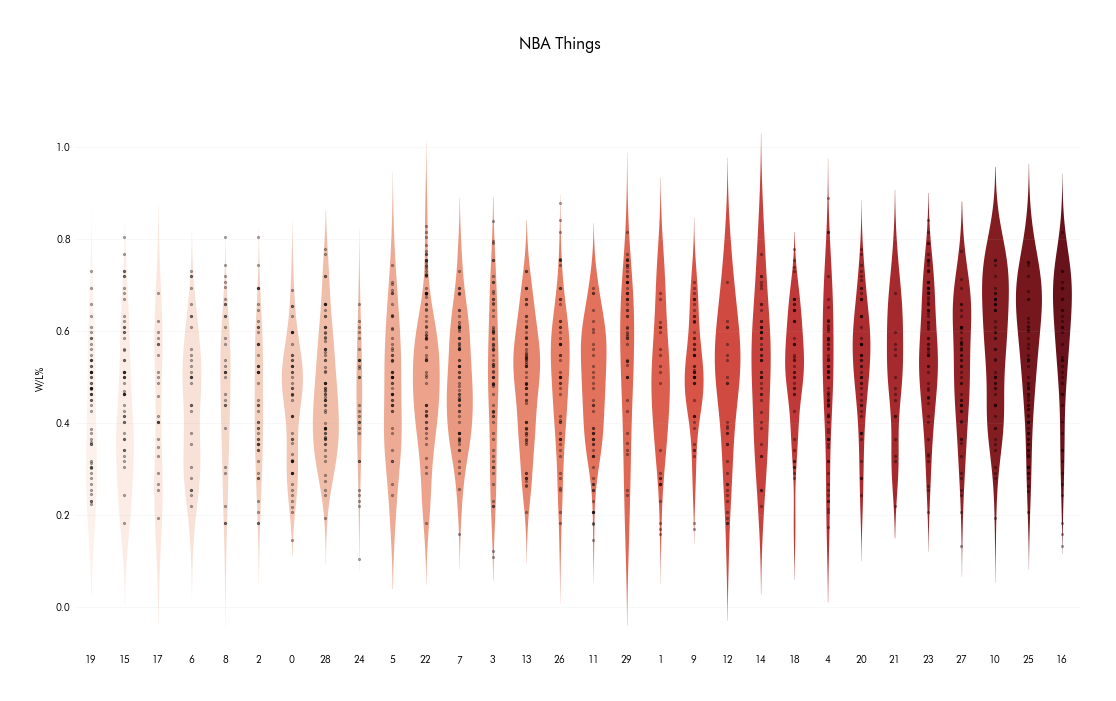

In [14]:
plt.rcParams["font.family"]='Futura Bk BT'
fig,ax = plt.subplots()
fig.suptitle('NBA Things')
fig.set_size_inches(18,10)
#sns.distplot(all_nba['W/L%'],kde=True,rug=True)
sns.violinplot(y='W/L%',x=all_nba.index,order=all_nba.groupby(all_nba.index).mean()['W/L%'].sort_values().index,data=all_nba,palette='Reds',linewidth=0,scale='count')
sns.regplot(x=all_nba.index.values, y='W/L%', data=all_nba, fit_reg=False,color='black',scatter_kws={'alpha':0.3,'s':5})

#sns.boxplot(y='W/L%',x=all_nba.index,data=all_nba,palette='Reds',order=all_nba.groupby(all_nba.index).mean()['W/L%'].sort_values().index)
#x_ticks = ax.set_xticks([x/10 for x in range(10)])

#ax_text = ax.set_xticklabels(all_nba['Current Team'].unique(),rotation=90,fontsize=16)


#order=all_nba.groupby(all_nba.index).mean()['W/L%'].sort_values().index

In [232]:
team_dictionary = dict(all_nba[~all_nba.index.duplicated(keep='first')]['Team'])
all_nba['Current Team'] = pd.Series(all_nba.index).map(team_dictionary).values

In [18]:
team_dictionary

{0: 'Washington Wizards',
 1: 'Milwaukee Bucks',
 2: 'Toronto Raptors',
 3: 'Orlando Magic',
 4: 'Miami Heat',
 5: 'Cleveland Cavaliers',
 6: 'Brooklyn Nets',
 7: 'Detroit Pistons',
 8: 'Charlotte Hornets',
 9: 'Indiana Pacers',
 10: 'Boston Celtics',
 11: 'Atlanta Hawks',
 12: 'Philadelphia 76ers',
 13: 'New York Knicks',
 14: 'Chicago Bulls',
 15: 'Los Angeles Clippers',
 16: 'San Antonio Spurs',
 17: 'Memphis Grizzlies',
 18: 'Houston Rockets',
 19: 'Minnesota Timberwolves',
 20: 'Portland Trail Blazers',
 21: 'Utah Jazz',
 22: 'Golden State Warriors',
 23: 'Oklahoma City Thunder',
 24: 'New Orleans Pelicans',
 25: 'Los Angeles Lakers',
 26: 'Denver Nuggets',
 27: 'Phoenix Suns',
 28: 'Sacramento Kings',
 29: 'Dallas Mavericks'}

In [123]:
all_nba['Current Team'] = pd.Series(all_nba.index).map(team_dictionary).values

In [168]:
def extract_player_data(table_rows):
    """
    Extract and return the the desired information from the td elements within
    the table rows.
    """
    # create the empty list to store the player data
    player_data = []
    
    for row in table_rows:  # for each row do the following

        
        player_list = [th.get_text() for th in row.find_all("th")]+[td.get_text() for td in row.find_all("td")]

        if not player_list:
            continue

        player_data.append(player_list)
        
    return player_data

In [216]:
#noted that frame did not return data for all teams. To investigate:

empty_dict = {}

for i,v in enumerate(['WAS','MIL','TOR','ORL','MIA',
            'CLE','BRK','DET','CHO','IND',
             'BOS','ATL','PHI','NYK','CHI',
             'LAC','SAS','MEM','HOU',
             'MIN','POR','UTA','GSW','OKC',
             'NOP','LAL','DEN','PHO','SAC','DAL']):
    empty_dict[i] = v

def match_lookup():    
    non_match_keys = [x for x in set(empty_dict.keys()) if x not in all_nba.index.value_counts().sort_index().index]
    return non_match_keys 
    #if len(non_match_keys)>0:
     #   return [empty_dict[x] for x in [x for x in non_match_keys]]
    #else:
     #   return 'All keys match'

#more research shows URL forwarding

#NOP's ID is NOH
#BRK's ID is NJN
#CHO's ID is CHA

In [208]:
#non_match_keys = [x for x in set(empty_dict.keys()) if x not in all_nba.index.value_counts().sort_index().index]
#non_match_values = [empty_dict[x] for x in [x for x in non_match_keys]]
#non_match_values

['CHO']